In [1]:
import pandas as pd
df1 = pd.read_csv('dialect_dataset.csv')
df2 = pd.read_csv('retreived_text_data.csv')
x = df2['text']

# Factorizing the label column in the train and test dataframes:
#df1['label_id']=df1['dialect'].factorize()[0]
#display(df1[['dialect','label_id']].drop_duplicates())
y = df1['dialect']

In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words(['arabic','english']))

# Applying the clean_text function to the dataframe:
def clean_text(text):
    """
    text: a string
    return: modified initial string
    """
    text = re.sub(r'([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+', '' , text)
    text = text.rstrip()
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text

display(x.head(), x.tail())
x = x.apply(clean_text)
display(x.head(), x.tail())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdelrahman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


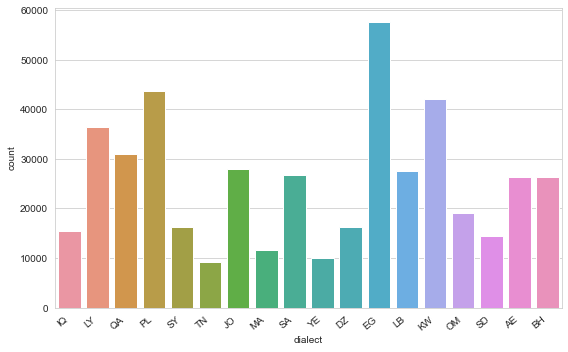

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0, stratify = y)

#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(sampling_strategy="auto")
#x_train, y_train = rus.fit_resample(x_train.to_frame(),y_train)
#x_train = x_train.squeeze()
#sns.set_style('whitegrid')
#plt.figure(figsize=(8, 5))
#ax = sns.countplot(x=y_train)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
tfidf = TfidfVectorizer(sublinear_tf= True, norm='l2', ngram_range=(1, 2), lowercase=None, stop_words = stopwords.words('arabic'))
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))

C:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


In [6]:
%store x_train_tfidf
%store x_test_tfidf
%store y_train
%store y_test
%store x_train
%store x_test

Stored 'x_traincv' (csr_matrix)
Stored 'x_testcv' (csr_matrix)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'x_train' (Series)
Stored 'x_test' (Series)
